In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm
import matplotlib.ticker as ticker

## Abertura do dados
---


### Importação Brasil
Link: [Ministério da Economia](https://balanca.economia.gov.br/balanca/bd/comexstat-bd/ncm/IMP_COMPLETA.zip)

In [ ]:
#df_importacao = pd.read_csv("/content/drive/Shareddrives/TCC Daniel dados/IMP_COMPLETA.csv",sep=';')
df_importacao = pd.read_csv('../datasets/IMP_COMPLETA.csv',sep=';')
df_importacao.info()

### IPCA Série Histórica
Link: [IPCA Série histórica](https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?edicao=20932&t=downloads)

In [63]:
#df_ipca = pd.read_excel("/content/drive/Shareddrives/TCC Daniel dados/ipca_202201SerieHist.xlsx")
df_ipca = pd.read_excel("../datasets/ipca_202201SerieHist.xlsx")
df_ipca.info()

XLRDError: Excel xlsx file; not supported

### Dolar Série Histórica
Link: [Dolar Serie Historica](https://www.cepea.esalq.usp.br/br/serie-de-preco/dolar.aspx)

In [64]:
df_dolar = pd.read_csv("../datasets/export_series_dolar.csv")
df_dolar.columns = ['data','valor']
df_dolar = df_dolar.iloc[:-1,:]
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    6397 non-null   object
 1   valor   6397 non-null   object
dtypes: object(2)
memory usage: 100.1+ KB


## Tabelas auxiliares
---
Link: [Tabela Códigos](https://balanca.economia.gov.br/balanca/bd/tabelas/TABELAS_AUXILIARES.xlsx)

Indice Excel usado
* 16 (CO_NCM)
* 10 (CO_PAIS)
* 14 (CO_VIA)
* 15 (CO_URF)
* 12 (SG_UF)


Da mesma forma, a formatação dos dados está correta e também não há dados nulos não havendo necessidade de tratá-los.

In [5]:
#url = "https://github.com/Migliorin/Comex_Data_Analysis/blob/main/datasets/TABELAS_AUXILIARES.xlsx?raw=true"
#xl_file = pd.ExcelFile(url)

xl_file = pd.ExcelFile('../datasets/TABELAS_AUXILIARES.xlsx')
df_pais = xl_file.parse('10')
df_ncm = xl_file.parse('16')
df_via = xl_file.parse('14')
df_urf = xl_file.parse('15')
df_uf = xl_file.parse('12')

In [6]:
df_pais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CO_PAIS        281 non-null    int64 
 1   CO_PAIS_ISON3  281 non-null    int64 
 2   CO_PAIS_ISOA3  281 non-null    object
 3   NO_PAIS        281 non-null    object
 4   NO_PAIS_ING    281 non-null    object
 5   NO_PAIS_ESP    281 non-null    object
dtypes: int64(2), object(4)
memory usage: 13.3+ KB


In [7]:
df_ncm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13164 entries, 0 to 13163
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CO_NCM         13164 non-null  int64 
 1   NO_NCM_POR     13164 non-null  object
 2   CO_ISIC_SECAO  13164 non-null  object
 3   NO_ISIC_SECAO  13164 non-null  object
 4   CO_CUCI_GRUPO  13164 non-null  object
 5   NO_CUCI_GRUPO  13164 non-null  object
dtypes: int64(1), object(5)
memory usage: 617.2+ KB


In [8]:
df_via.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CO_VIA  17 non-null     int64 
 1   NO_VIA  17 non-null     object
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


In [9]:
df_urf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CO_URF  276 non-null    int64 
 1   NO_URF  276 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


In [10]:
df_uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CO_UF      34 non-null     int64 
 1   SG_UF      34 non-null     object
 2   NO_UF      34 non-null     object
 3   NO_REGIAO  34 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


## Dados nulos Importações
---
No dataset de Importações não há presença de valores nulos não havendo necessidade de tratá-los.

In [11]:
df_importacao.isnull().sum()

CO_ANO        0
CO_MES        0
CO_NCM        0
CO_UNID       0
CO_PAIS       0
SG_UF_NCM     0
CO_VIA        0
CO_URF        0
QT_ESTAT      0
KG_LIQUIDO    0
VL_FOB        0
VL_FRETE      0
VL_SEGURO     0
dtype: int64

## Substituição código
---
Para melhor análise e entedimento, será usado a tabela de códigos para substituir os códigos dentro da base bruta. Como as colunas de alguns códigos serão traduzidas, então serão retirados as seguintes colunas:

* CO_NCM
* CO_PAIS
* CO_VIA
* CO_URF
* SG_UF_NCM

**Variável final**: df

In [12]:
df = df_importacao.merge(df_ncm[['CO_NCM','NO_CUCI_GRUPO']],on='CO_NCM').copy()
df = df.merge(df_pais[['CO_PAIS','NO_PAIS']],on='CO_PAIS')
df = df.merge(df_urf[['CO_URF','NO_URF']],on='CO_URF')
df = df.merge(df_via[['CO_VIA','NO_VIA']],on='CO_VIA')

df.rename({'SG_UF_NCM':'SG_UF'},axis=1,inplace=True)

df = df.merge(df_uf[['SG_UF','NO_REGIAO']],on='SG_UF')

In [13]:
df.drop(['CO_NCM','CO_PAIS','CO_URF','CO_VIA'],axis=1,inplace=True)

## Visualização do dataset

In [14]:
df.head()

,CO_ANO,CO_MES,CO_UNID,SG_UF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO,NO_CUCI_GRUPO,NO_PAIS,NO_URF,NO_VIA,NO_REGIAO
0,1997,9,10,SP,200,200,4888,180,24,Compostos de função nitrogênio,Bélgica,0817800 - PORTO DE SANTOS,MARITIMA,REGIAO SUDESTE
1,1999,11,10,SP,720,720,11304,75,0,Compostos de função nitrogênio,Bélgica,0817800 - PORTO DE SANTOS,MARITIMA,REGIAO SUDESTE
2,1999,5,10,SP,720,720,9948,138,0,Compostos de função nitrogênio,Bélgica,0817800 - PORTO DE SANTOS,MARITIMA,REGIAO SUDESTE
3,2000,11,10,SP,6000,6000,46260,2213,0,Compostos de função nitrogênio,Bélgica,0817800 - PORTO DE SANTOS,MARITIMA,REGIAO SUDESTE
4,2000,5,10,SP,5720,5720,51510,509,0,Compostos de função nitrogênio,Bélgica,0817800 - PORTO DE SANTOS,MARITIMA,REGIAO SUDESTE


## Visualização dos dados

## Países e Origens
---
Nesse gráfico é mostrado o número de importações feitas para o Brasil listando os 15+ países de origem. De 1997 a 2022, os 5 países que mais exportaram para o Brasil foram:

1. Estados Unidos
2. China
3. Alemanha
4. Italia
5. Japão


O próximo gráfico mostra o destino dos produtos predominando a região Sudeste, enquanto a região Norte fica em terceiro lugar.

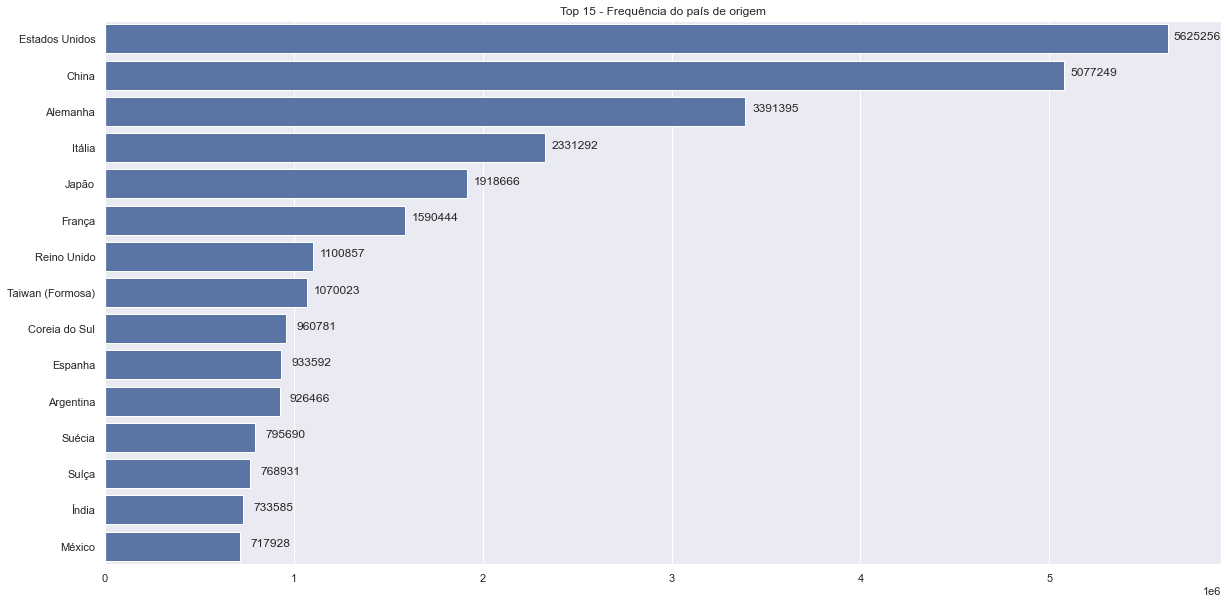

In [15]:
sns.set_theme(style="darkgrid")

# Contagem valores
count = df.NO_PAIS.value_counts()

# Inicializacao figura matplotlib
f, ax = plt.subplots(figsize=(20, 10))
bar = sns.barplot(x=list(count)[:15], y=list(count.index)[:15],
            label="Total", color="b")

for p in bar.patches:
    bar.annotate(int(p.get_width()), 
                   (p.get_width() + p.get_x(), p.get_y()), 
                   ha = 'center', va = 'center', 
                   xytext = (30, -12), 
                   textcoords = 'offset points')
    

ax.set_title("Top 15 - Frequência do país de origem")
plt.show()

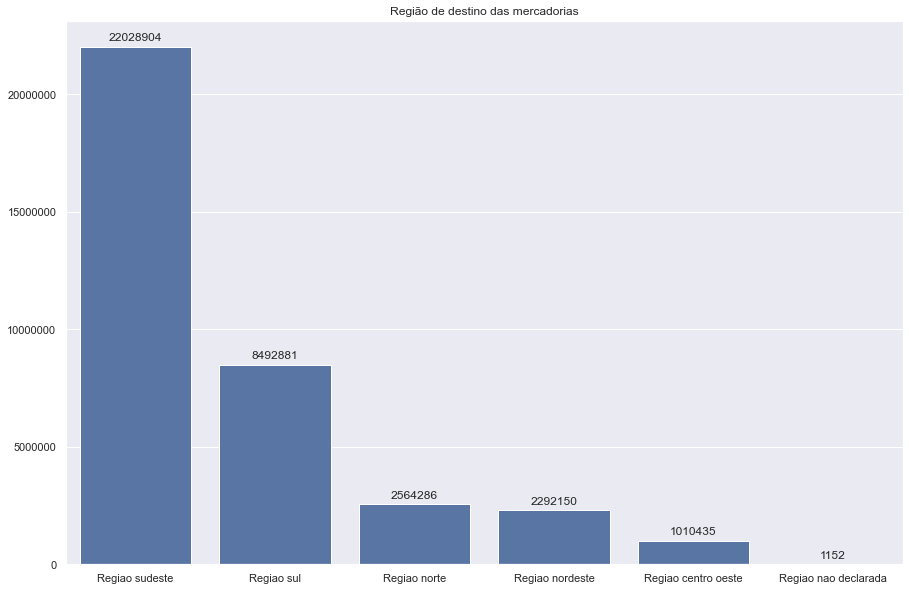

In [16]:
sns.set_theme(style="darkgrid")

# Contagem valores
count = df.NO_REGIAO.value_counts()

# Inicializacao figura matplotlib
f, ax = plt.subplots(figsize=(15, 10))
bar = sns.barplot(y=list(count), x=[x.lower().capitalize() for x in count.index],
            label="Total", color="b")

for p in bar.patches:
    bar.annotate(int(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    

ax.set_title("Região de destino das mercadorias")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: int(y)))
plt.show()

## Vias de transporte
---

Abaixo mostra o gráfico da quantidade de vezes que as vias de transporte foram usadas e sua porcentagem em relação ao todo. As vias mais utilizadas são a **Aerea**, **Marítima** e **Rodoviária**. As vias de transporte dentro do dataset são:

1. Aerea
2. Maritima
3. Rodoviaria
4. Entrada/saida ficta
5. Postal
6. Meios proprios
7. Ferroviaria
8. Conduto/rede de transmissao
9. Fluvial
10. Courier
11. Lacustre

Para melhor visualização, as demais vias serão incluídas na categoria "Outros" sendo assim **Aerea**, **Marítima**, **Rodoviária** e **Outras** as novas categorias de vias.

In [17]:
# Contagem dos valores
count = df.NO_VIA.value_counts()

total = count.sum()

Visão geral da quantidade

In [18]:
# Ajustes do dataframe

vias = pd.DataFrame(count)
vias.rename({'NO_VIA':'quantidade'},axis=1,inplace=True)

vias['porcentagem'] = vias.quantidade.apply(lambda x: x/total)

vias

,quantidade,porcentagem
AEREA,18148789,0.498733
MARITIMA,16890864,0.464165
RODOVIARIA,1113981,0.030612
ENTRADA/SAIDA FICTA,153762,0.004225
POSTAL,44562,0.001225
MEIOS PROPRIOS,28075,0.000772
FERROVIARIA,7786,0.000214
CONDUTO/REDE DE TRANSMISSAO,1108,0.000030
FLUVIAL,473,0.000013
COURIER,366,0.000010


Visão após a mudança

In [19]:
# Mudanca dos nomes

outros_qtd = vias.iloc[3:,:].quantidade.sum()
vias = vias.iloc[:3]
df_outros = pd.DataFrame({'quantidade' : outros_qtd,'porcentagem':outros_qtd/total},index=['Outros'])
vias = pd.concat([vias,df_outros])

vias

,quantidade,porcentagem
AEREA,18148789,0.498733
MARITIMA,16890864,0.464165
RODOVIARIA,1113981,0.030612
Outros,236174,0.006490


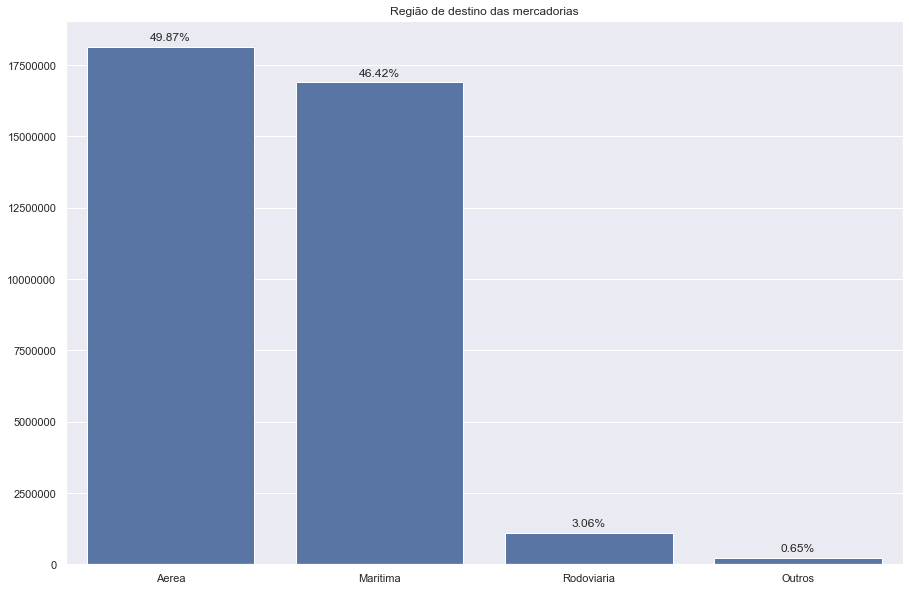

In [20]:
# Escolhendo o tema
sns.set_theme(style="darkgrid")


# Inicializacao figura matplotlib
f, ax = plt.subplots(figsize=(15, 10))
bar = sns.barplot(y=list(vias.quantidade), x=[x.lower().capitalize() for x  in vias.index],
            label="Total", color="b")

for i,p in enumerate(bar.patches):
    bar.annotate('{:.2f}%'.format((vias.porcentagem[i])*100), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    

ax.set_title("Região de destino das mercadorias")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: int(y)))
#plt.xticks(rotation=45)
plt.show()

Mudança no dataset principal

In [21]:
df.NO_VIA = df.NO_VIA.apply(lambda x : 'OUTROS' if x not in ['AEREA','MARITIMA','RODOVIARIA'] else x)

## Produtos
---

Nesse gráfico é mostrado os 10 produtos mais importados desde de 1997 até 2022 e os meios em que os produtos foram importados.

Para uma melhor análise, foi usado a função logarítmica para melhor observação das proporções.

A maioria dos produtos são peças ou equipamentos de empresas/industrias. Os 10 produtos importados em ordem descrecente:

1. Aparelhos elétricos para ligação, proteção ou conexão de circuitos
2. Máquinas e aparelhos elétricos
3. Adubos ou fertilizantes químicos (exceto fertilizantes brutos)
4. Válvulas e tubos termiônicas, de cátodo frio ou foto-cátodo, diodos, transistores
5. Gás natural, liquefeito ou não
6. Trigo e centeio, não moídos
7. Máquinas de energia elétrica (exceto planta elétrica rotativa do grupo 716) e suas partes
8. Produtos residuais de petróleo e materiais relacionados
9. Elementos químicos inorgânicos, óxidos e sais de halogêneos
10. Carvão, mesmo em pó, mas não aglomerado


In [22]:
aa = df.groupby(['NO_CUCI_GRUPO']).sum().sort_values(by=['QT_ESTAT'],ascending=False)
aa = aa.iloc[:10,:][['QT_ESTAT']]
aa.reset_index(inplace=True)

total = aa.copy()

In [23]:
aa = df.groupby(['NO_CUCI_GRUPO','NO_VIA']).sum().sort_values(by=['QT_ESTAT'],ascending=False)

aa.reset_index(inplace=True)

In [24]:
final = aa.merge(total,on=['NO_CUCI_GRUPO'],how='left')

final = final.rename({'QT_ESTAT_x':'QT_VIA','QT_ESTAT_y':'TOTAL'},axis=1).sort_values(by=['TOTAL'],ascending=False)

final = final[final.NO_CUCI_GRUPO.apply(lambda x: True if x in list(total.NO_CUCI_GRUPO) else False)]
final = final[['NO_CUCI_GRUPO','NO_VIA','QT_VIA','TOTAL']]
final.reset_index(inplace=True)

In [25]:
produtos = list(final.NO_CUCI_GRUPO.value_counts().index)
produtos.sort()

In [26]:
df_final = []

for prod in produtos:
    aux = final[final.NO_CUCI_GRUPO == prod][['NO_VIA','QT_VIA']]
    df_final.append(pd.DataFrame([list(aux['QT_VIA'])],columns=list(aux['NO_VIA']),index=[prod]))

df_final = pd.concat(df_final)

df_final.fillna(0,inplace=True)

C:\Python310\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


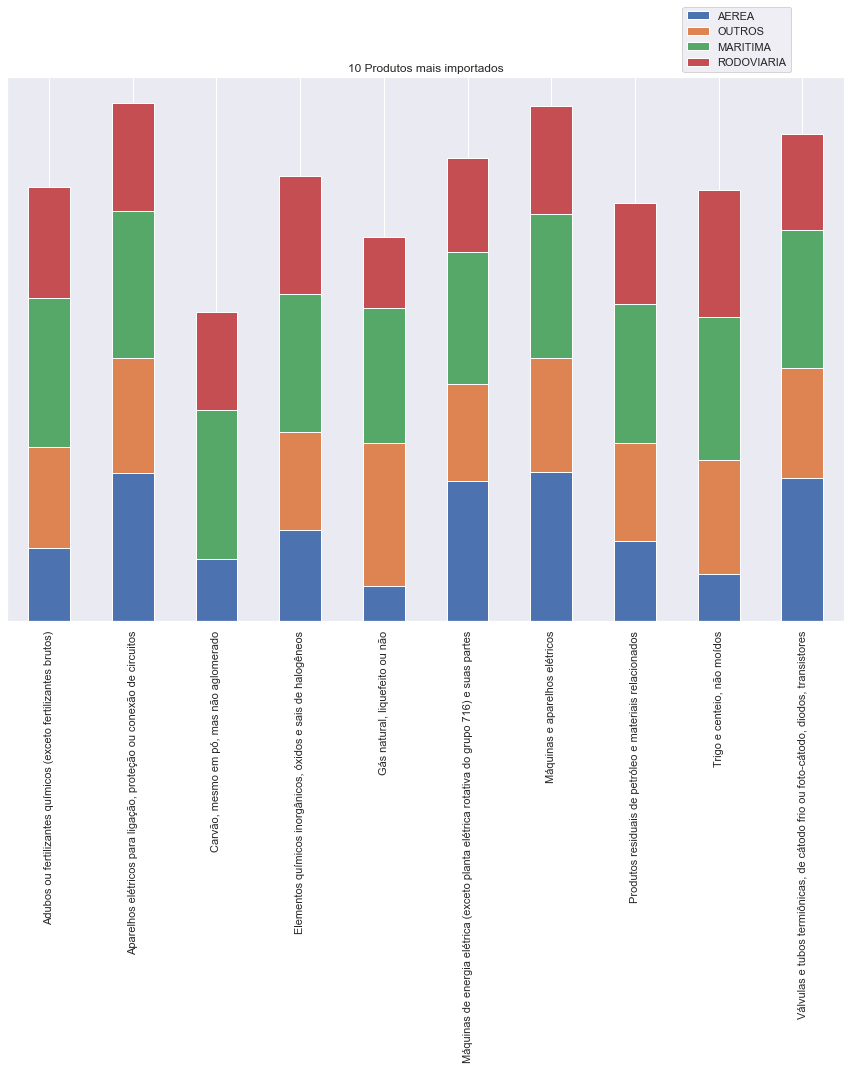

In [27]:
barplot = np.log(df_final).plot(kind="bar",stacked=True,figsize=(15,10))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.title('10 Produtos mais importados')
ax.set_xlabel('Quantidade')
ax.set_ylabel('Produto')
plt.yticks([])
plt.show()

## Dolar
---
Análise do preço do dolar ao longo do tempo

In [65]:
df_dolar.data = pd.to_datetime(df_dolar.data.apply(lambda x: "-".join(x.split('/')[::-1])))

In [66]:
df_dolar.valor = df_dolar.valor.apply(lambda x: float(x.replace(',','.')))

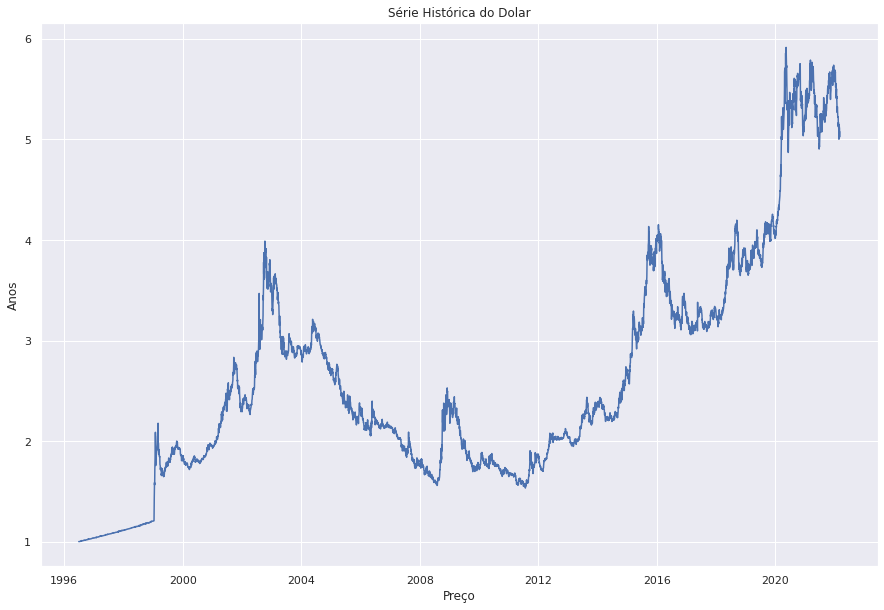

In [67]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=df_dolar, x="data", y="valor")
ax.set_title("Série Histórica do Dolar")
ax.set_xlabel("Preço")
ax.set_ylabel("Anos")
plt.show()

In [69]:
ano = []
mes = []
for data in df_dolar.data:
    ano.append(int(data.year))
    mes.append(int(data.month))

In [70]:
df_dolar['ano'] = ano
df_dolar['mes'] = mes

In [71]:
df_dolar

,data,valor,ano,mes
0,2022-03-04,5.079,2022,3
1,2022-03-03,5.024,2022,3
2,2022-03-02,5.110,2022,3
3,2022-02-25,5.145,2022,2
4,2022-02-24,5.117,2022,2
...,...,...,...,...
6392,1996-07-04,1.004,1996,7
6393,1996-07-03,1.005,1996,7
6394,1996-07-02,1.005,1996,7
6395,1996-07-01,1.004,1996,7


## IPCA
---
Inflação histórica desde 1994

In [28]:
def plot_corr(df_ipca,col):
    anos = list(df_ipca['ANO'].value_counts().index)
    anos.sort()
    
    row = (len(anos)// col) + 1

    fig, axs = plt.subplots(row, col,figsize=(20, 15))

    posi = 0
    for i in tqdm(range(row)):
        for j in range(col):
            if(len(anos) == posi):
                axs[i, j].set_axis_off()
            else:
                aux = df_ipca[df_ipca['ANO'] == anos[posi]]
                axs[i, j].plot(aux['MÊS'].apply(lambda x: f'{x.lower()}' ) ,aux['12 MESES'])
                axs[i, j].set_title(str(int(anos[posi])))
                # fig.autofmt_xdate(rotation=45)
                posi += 1

    plt.tight_layout()
    plt.show()

  0%|          | 0/6 [00:00<?, ?it/s]

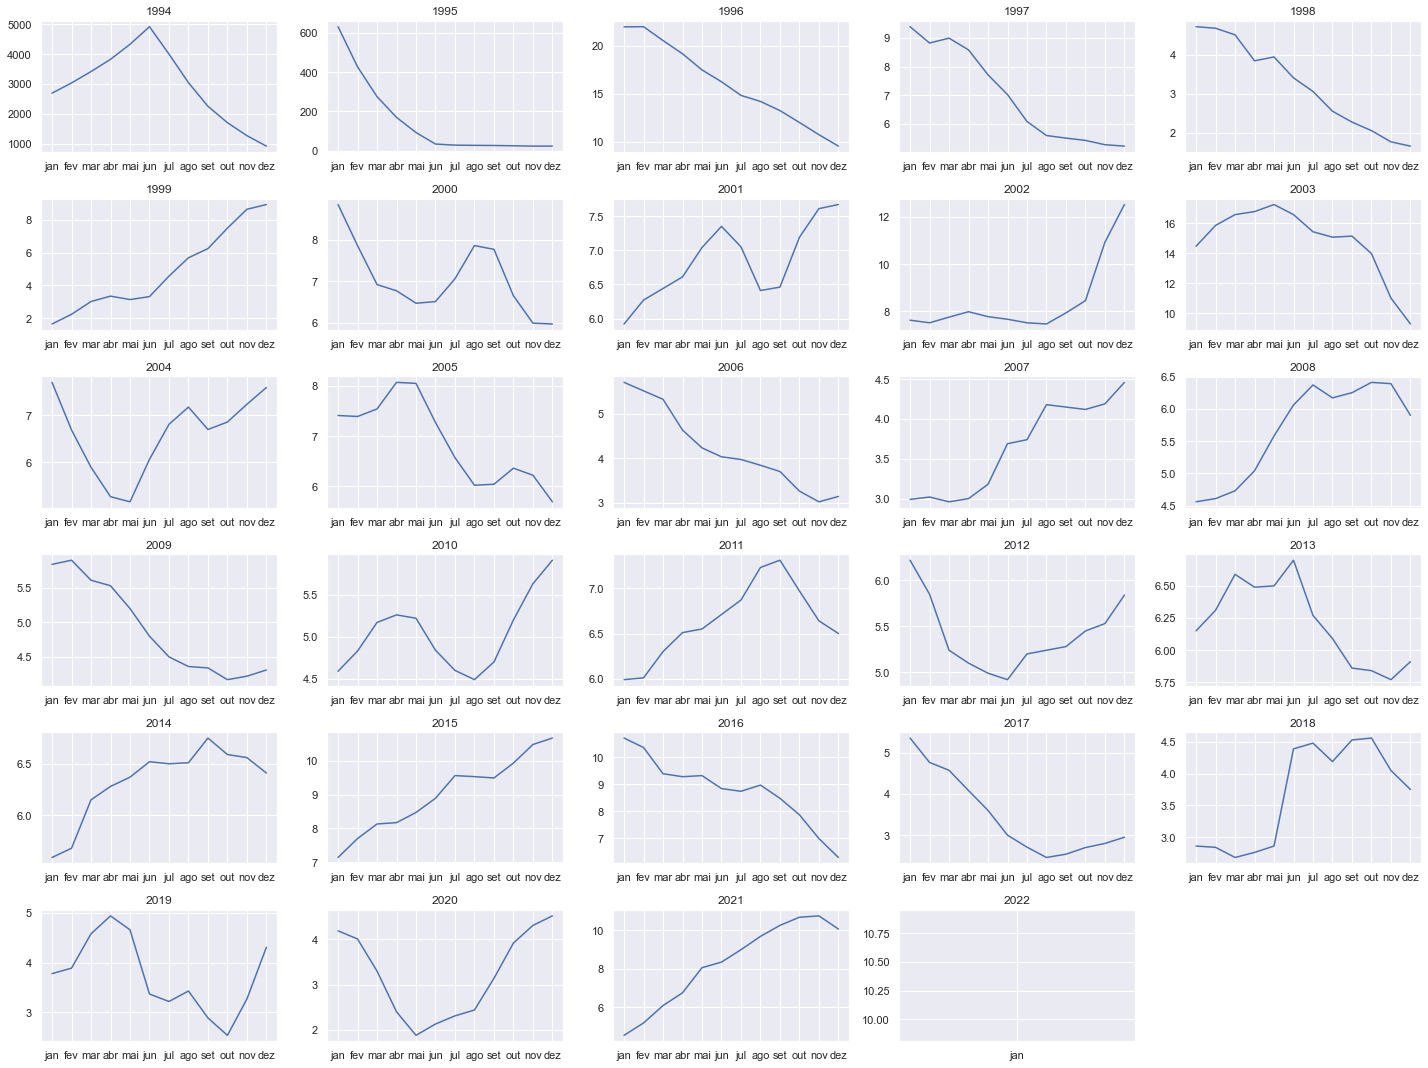

In [29]:
plot_corr(df_ipca,5)

## Unindo datasets
---

Separando os 10 produtos mais comercializados

In [30]:
aa = df_importacao[['CO_NCM','QT_ESTAT']].groupby(['CO_NCM']).sum().sort_values(by=['QT_ESTAT'],ascending=False)
aa = aa.iloc[:10,:][['QT_ESTAT']]
aa.reset_index(inplace=True)

total = aa.copy()

In [31]:
def get_produtos(df_importacao:pd.DataFrame,co_produto:list):
    aux = []
    for codigo in tqdm(co_produto,total=len(co_produto)):
        aux.append(df_importacao[df_importacao.CO_NCM == codigo])
    aux = pd.concat(aux)
    aux.reset_index(drop=True,inplace=True)
    return aux

df_base = get_produtos(df_importacao,list(total.CO_NCM))

  0%|          | 0/10 [00:00<?, ?it/s]

Mudança dos meses para variavel numérica

In [32]:
aux_dict = {
    'JAN':1,
    'FEV':2,
    'MAR':3,
    'ABR':4,
    'MAI':5,
    'JUN':6,
    'JUL':7,
    'AGO':8,
    'SET':9,
    'OUT':10,
    'NOV':11,
    'DEZ':12,
}

df_ipca['MÊS'] = df_ipca['MÊS'].apply(lambda x: aux_dict[x]) 

In [33]:
df_ipca['ANO'] = df_ipca['ANO'].apply(lambda x: int(x))

In [34]:
df_base = df_base.merge(df_ipca[['ANO','MÊS','12 MESES']],left_on=['CO_ANO','CO_MES'],right_on=['ANO','MÊS'])
df_base.drop(['ANO','MÊS'],inplace=True,axis=1)

Mapeando as UF para números

In [35]:
def mudanca_uf(df_base:pd.DataFrame):
    aux_dict = dict(zip(list(df_base.SG_UF_NCM.value_counts().index),range(len(df_base.SG_UF_NCM.value_counts()))))
    df_base.SG_UF_NCM = df_base.SG_UF_NCM.apply(lambda x: aux_dict[x])

mudanca_uf(df_base)

In [36]:
df_base.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO,12 MESES
0,1997,6,85322410,11,399,0,4,817700,30000,15,1394,105,8,7.02
1,1997,6,85322410,11,249,5,4,1017600,6614,9,3094,127,0,7.02
2,1997,6,85322410,11,386,0,4,817700,1368,7,50,178,2,7.02
3,1997,6,85322410,11,161,0,4,817700,1381000,816,16937,4967,56,7.02
4,1997,6,85322410,11,249,2,4,817700,1000,0,600,17,2,7.02


## Correlações
---
Para identificar os atributos que possuem correlação com o valor do frete.

O frete possui relação com os atributos **Quantidade estatística**, **FOB** e **Kilograma Líquido**.

In [37]:
corr = df_base.corr()

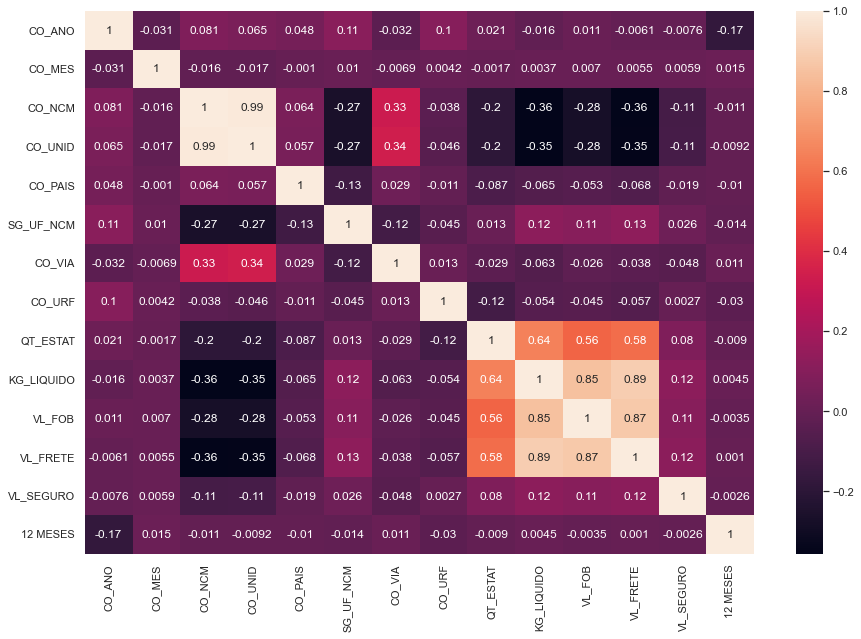

In [38]:
with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(15, 10))

    ax = sns.heatmap(corr,annot=True)

**Função para plot de correlações**

In [39]:
def plot_corr(df,col,xcor):
    anos = list(df.CO_ANO.value_counts().index)
    anos.sort()
    
    row = (len(anos)// col) + 1

    fig, axs = plt.subplots(row, col,figsize=(20, 15))

    posi = 0
    for i in tqdm(range(row)):
        for j in range(col):
            if(len(anos) == posi):
                axs[i, j].set_axis_off()
            else:
                aux = df[df.CO_ANO == anos[posi]]
                axs[i, j].scatter(x=aux[xcor],y=aux.VL_FRETE)
                axs[i, j].set_title(str(anos[posi]))
                posi += 1

    plt.tight_layout()
    plt.show()

## Frete - Quilograma
---

  0%|          | 0/6 [00:00<?, ?it/s]

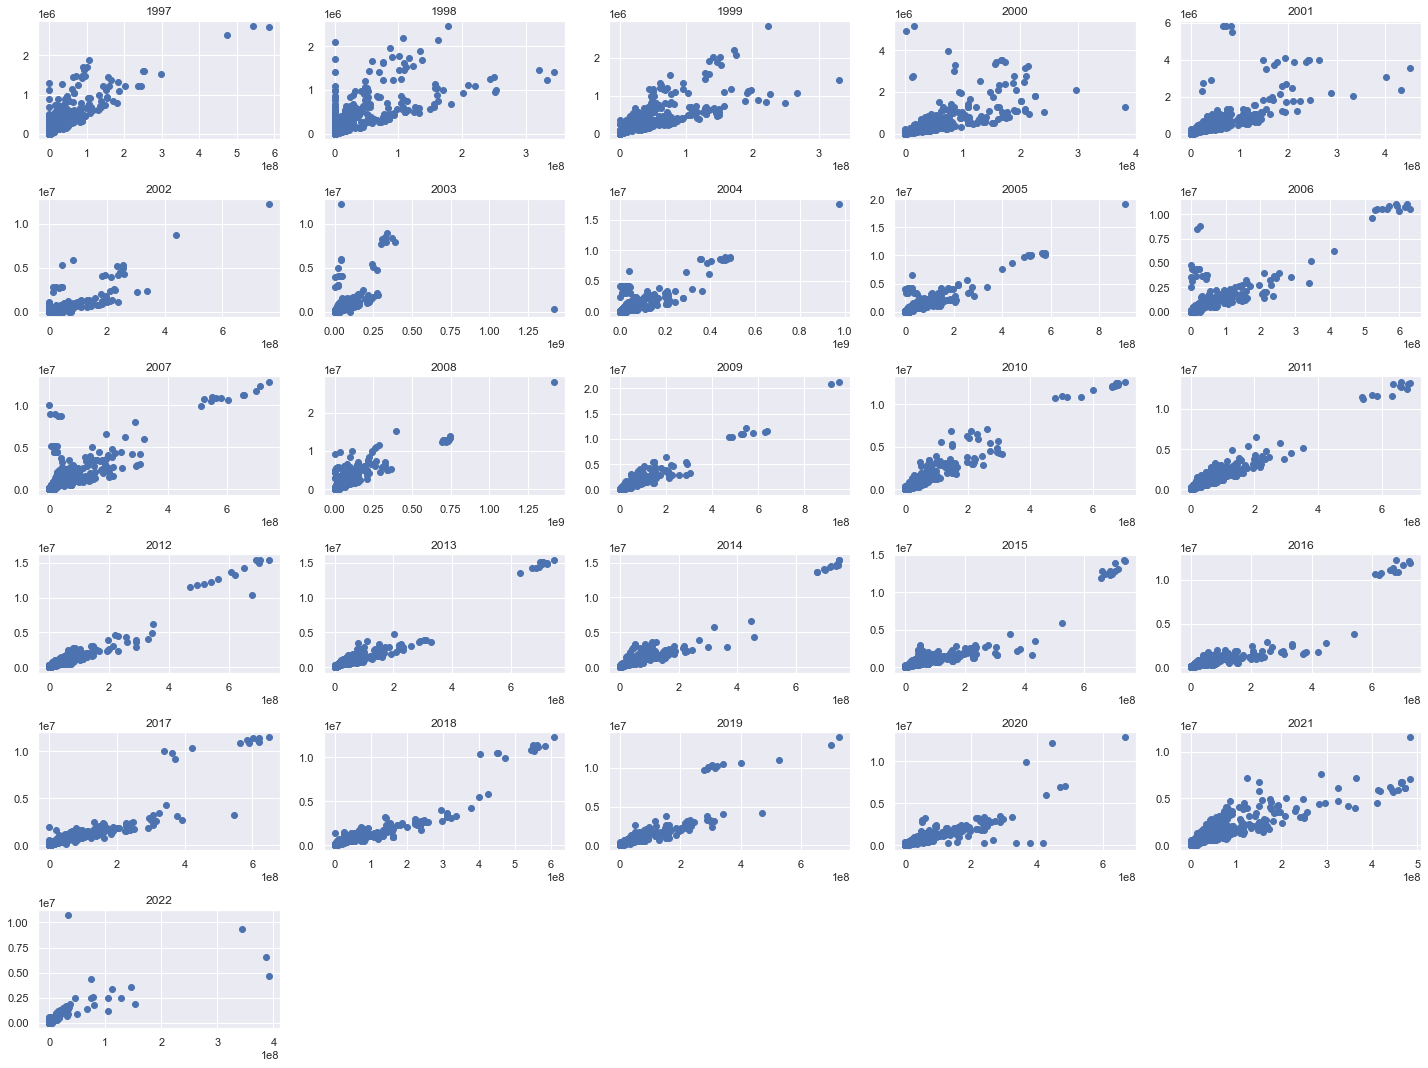

In [40]:
plot_corr(df_base,5,'KG_LIQUIDO')

## Frete - Quantidade
---

  0%|          | 0/6 [00:00<?, ?it/s]

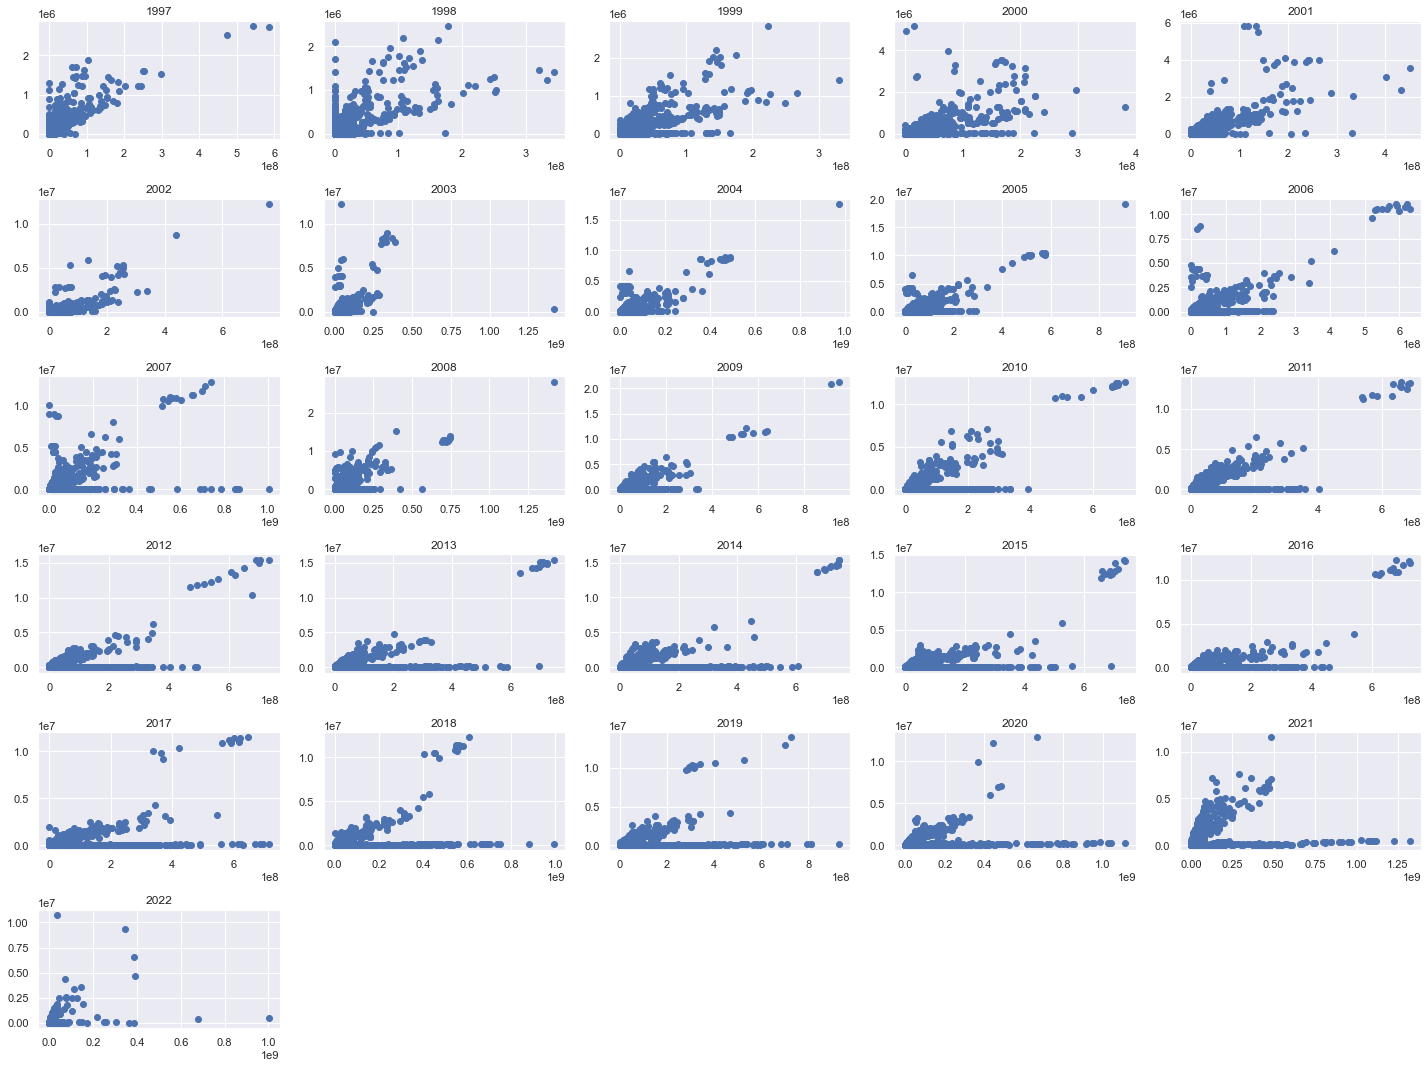

In [41]:
plot_corr(df_base,5,'QT_ESTAT')

## Frete - FOB
---

  0%|          | 0/6 [00:00<?, ?it/s]

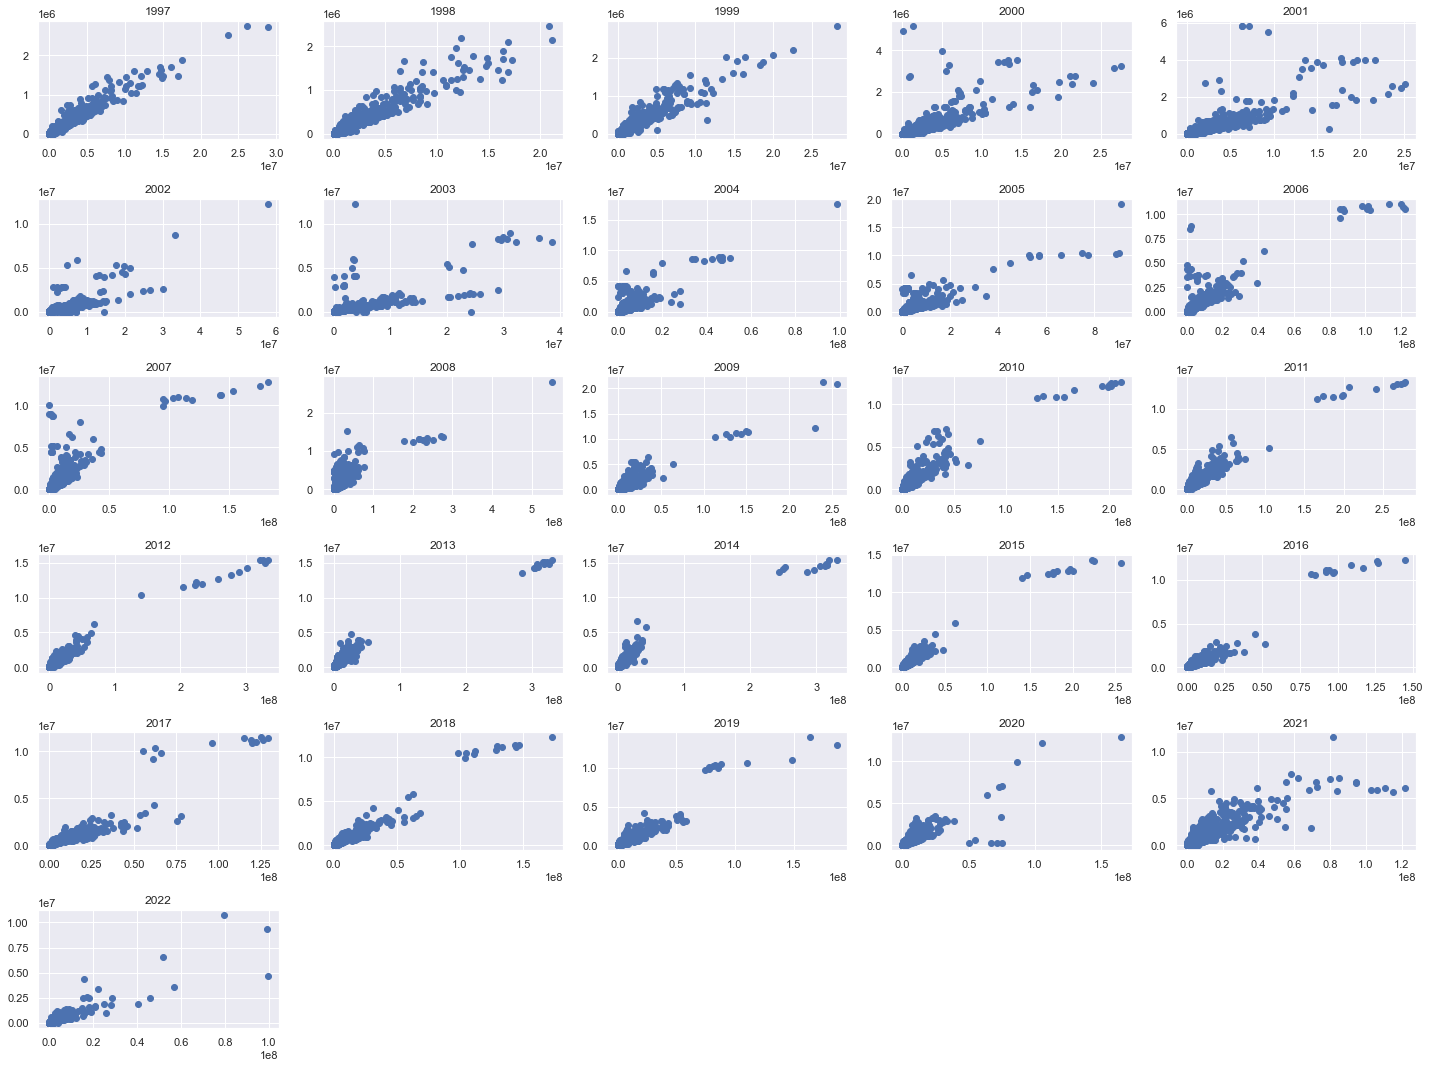

In [42]:
plot_corr(df_base,5,'VL_FOB')

## Variáveis para aprendizado de máquina
---

In [43]:
df_base = df_base[[
    'CO_NCM',
    'CO_ANO',
    'CO_MES',
    'SG_UF_NCM',
    'QT_ESTAT',
    'KG_LIQUIDO',
    'VL_FOB',
    '12 MESES',
    'VL_SEGURO',
    'VL_FRETE'
]]

Separando dados para treino e teste

In [59]:
df_base = df_base[df_base.VL_FRETE != 0]

In [60]:
df_base.head()

,CO_NCM,CO_ANO,CO_MES,SG_UF_NCM,QT_ESTAT,KG_LIQUIDO,VL_FOB,12 MESES,VL_SEGURO,VL_FRETE
0,85322410,1997,6,0,30000,15,1394,7.02,8,105
1,85322410,1997,6,5,6614,9,3094,7.02,0,127
2,85322410,1997,6,0,1368,7,50,7.02,2,178
3,85322410,1997,6,0,1381000,816,16937,7.02,56,4967
4,85322410,1997,6,2,1000,0,600,7.02,2,17


## Treinamento

In [61]:
from sklearn.metrics import mean_squared_error, median_absolute_error,r2_score

In [62]:
def treinamento_metricas(clf,X_train, X_test, y_train, y_test):
    clf.fit(X_train,y_train)
    predict = clf.predict(X_test)
    mse = mean_squared_error(y_test, predict)
    r2 = r2_score(y_test, predict)
    mae = median_absolute_error(y_test, predict)
    print(f'MSE: {mse}\nR2: {r2}\nMAE: {mae}')
    

In [63]:
from sklearn.model_selection import train_test_split

X, y = df_base.drop(['VL_FRETE'],axis=1), df_base.VL_FRETE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [64]:
from sklearn.svm import SVR
svm = SVR(verbose=True)

In [65]:
treinamento_metricas(svm,X_train, X_test, y_train, y_test)

[LibSVM]MSE: 151686261704.55402
R2: -0.009208161161538442
MAE: 176.7583667716226


**dolar**

In [3]:
df_produto = pd.read_csv("../datasets/85322410.csv")

In [6]:
df_produto = df_produto.iloc[:,1:]

In [20]:
df_produto

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
0,1997,6,85322410,11,399,SP,4,817700,30000,15,1394,105,8
1,1997,12,85322410,11,161,AM,4,227600,9269100,503,69529,2760,94
2,1997,8,85322410,11,249,MG,4,617600,1001140,200,14460,690,59
3,1997,11,85322410,11,573,SP,4,817600,1000,0,46,0,0
4,1997,9,85322410,11,399,SP,4,817700,41020,19,1228,71,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,2022,1,85322410,11,455,SC,4,817600,48500,17,8176,108,2
49990,2022,1,85322410,11,383,SP,4,817700,592520,6,17757,98,2
49991,2022,1,85322410,11,399,RJ,4,817700,3250,0,181,4,0
49992,2022,1,85322410,11,161,SC,4,817700,960000,54,54973,754,13


In [28]:
ano = []
mes = []
for data in df_dolar.data:
    ano.append(int(data.year))
    mes.append(int(data.month))

In [29]:
df_dolar['ano'] = ano
df_dolar['mes'] = mes

In [33]:
df_dolar = df_dolar.groupby(['ano','mes']).mean()

In [34]:
df_dolar.reset_index(inplace=True)

In [53]:
df_dolar.groupby(['ano']).describe()

mes                                             valor            \
     count mean       std  min   25%  50%    75%   max count      mean   
ano                                                                      
1996   7.0  9.0  2.160247  6.0  7.50  9.0  10.50  12.0   7.0  1.019312   
1997  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  1.077726   
1998  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  1.160313   
1999  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  1.817074   
2000  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  1.831102   
2001  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  2.352394   
2002  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  2.924490   
2003  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  3.078106   
2004  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  2.926205   
2005  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  2.434733   
2006  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  2.176269   
2007  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  1.947693   
2008  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  1.836204   
2009  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  1.998092   
2010  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  1.761152   
2011  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  1.675372   
2012  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  1.954752   
2013  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  2.159027   
2014  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  2.354596   
2015  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  3.331573   
2016  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  3.487211   
2017  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  3.192017   
2018  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  3.654592   
2019  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  3.944468   
2020  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  5.158035   
2021  12.0  6.5  3.605551  1.0  3.75  6.5   9.25  12.0  12.0  5.397097   
2022   3.0  2.0  1.000000  1.0  1.50  2.0   2.50   3.0   3.0  5.262621   

                                                                  
           std       min       25%       50%       75%       max  
ano                                                               
1996  0.012253  1.004000  1.009893  1.019000  1.027673  1.037053  
1997  0.023039  1.042591  1.059729  1.077514  1.094823  1.113150  
1998  0.027761  1.119667  1.139136  1.157983  1.182643  1.204800  
1999  0.135361  1.500684  1.748615  1.865726  1.907911  1.969100  
2000  0.068536  1.742095  1.792798  1.809395  1.849720  1.963632  
2001  0.251776  1.956318  2.171712  2.371053  2.519670  2.738045  
2002  0.557141  2.321045  2.408674  2.833757  3.406652  3.798043  
2003  0.260697  2.859609  2.906033  2.944627  3.193872  3.594800  
2004  0.122905  2.720238  2.853359  2.905583  3.010148  3.128429  
2005  0.170904  2.210400  2.290857  2.394506  2.583262  2.704909  
2006  0.042567  2.127500  2.151310  2.160281  2.184970  2.273182  
2007  0.125345  1.770950  1.862227  1.948721  2.046157  2.138409  
2008  0.281946  1.591043  1.649106  1.717675  1.895011  2.401500  
2009  0.234738  1.728100  1.802082  1.945655  2.231379  2.313500  
2010  0.049618  1.684250  1.717616  1.764955  1.792041  1.839778  
2011  0.092671  1.563333  1.593472  1.663963  1.758480  1.839048  
2012  0.128215  1.717316  1.840624  2.027597  2.035082  2.079889  
2013  0.145196  1.973889  2.022648  2.182961  2.274991  2.347895  
2014  0.136300  2.221714  2.235125  2.331134  2.400037  2.641850  
2015  0.442162  2.635810  3.057150  3.184334  3.800350  3.905667  
2016  0.289423  3.183100  3.271250  3.385721  3.588690  4.053850  
2017  0.065074  3.101944  3.138821  3.194652  3.221882  3.296476  
2018  0.298610  3.209409  3.375333  3.771680  3.841077  4.106737  
2019  0.157750  3.721200  3.827284  3.945432

In [37]:
df_produto = df_produto.merge(df_dolar,left_on=['CO_ANO','CO_MES'],right_on=['ano','mes'])

In [40]:
df_produto.drop(['ano','mes','CO_NCM','CO_UNID'],axis=1,inplace=True)

In [42]:
df_produto = df_produto[df_produto.VL_FRETE != 0]

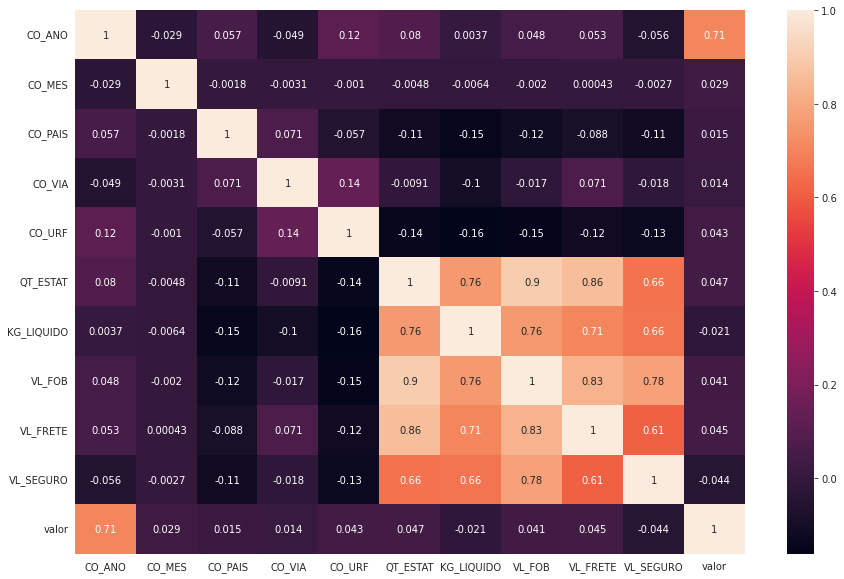

In [47]:
with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(15, 10))

    ax = sns.heatmap(df_produto.corr(),annot=True)

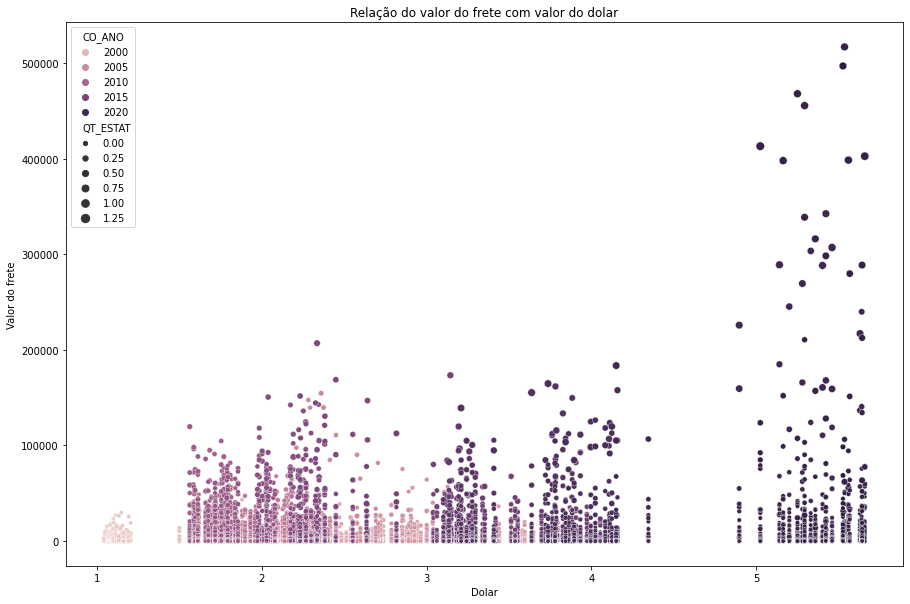

In [60]:
f, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=df_produto,x='valor',y='VL_FRETE',hue='CO_ANO',size="QT_ESTAT")
ax.set_xlabel('Dolar')
ax.set_ylabel('Valor do frete')

ax.set_title('Relação do valor do frete com valor do dolar')
plt.show()

In [62]:
df_dolar

,ano,mes,valor
0,1996,6,1.004000
1,1996,7,1.006696
2,1996,8,1.013091
3,1996,9,1.019000
4,1996,10,1.025045
...,...,...,...
305,2021,11,5.558900
306,2021,12,5.658238
307,2022,1,5.525810
308,2022,2,5.191053


In [ ]:
sns.catplot(x="sex", y="total_bill",

                hue="smoker", col="time",

                data=tips, kind="box",

                height=4, aspect=.7);